In [1]:
import import_ipynb
import IntimeLibrary as il
import FlieLibrary as fl
import pandas as pd
import numpy as np

importing Jupyter notebook from IntimeLibrary.ipynb
importing Jupyter notebook from FlieLibrary.ipynb


In [2]:
fl.depart_flight.drop(['항공사','현황','TM'], axis=1, inplace=True)
fl.depart_flight = pd.get_dummies(fl.depart_flight, columns=["ORIGIN","DEST", "weekend"])

In [3]:
fl.depart_flight.head()

,날짜,time,DelayRate,ORIGIN_김포공항,ORIGIN_제주공항,DEST_김포공항,DEST_제주공항,weekend_FRI,weekend_MON,weekend_SAT,weekend_SUN,weekend_THU,weekend_TUE,weekend_WED
0,20181001,6,1,0,1,1,0,0,1,0,0,0,0,0
1,20181001,6,1,0,1,1,0,0,1,0,0,0,0,0
2,20181001,7,1,0,1,1,0,0,1,0,0,0,0,0
3,20181001,7,1,0,1,1,0,0,1,0,0,0,0,0
4,20181001,7,1,0,1,1,0,0,1,0,0,0,0,0


In [4]:
fl.depart_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88631 entries, 0 to 88630
Data columns (total 14 columns):
날짜             88631 non-null int64
time           88631 non-null int64
DelayRate      88631 non-null category
ORIGIN_김포공항    88631 non-null uint8
ORIGIN_제주공항    88631 non-null uint8
DEST_김포공항      88631 non-null uint8
DEST_제주공항      88631 non-null uint8
weekend_FRI    88631 non-null uint8
weekend_MON    88631 non-null uint8
weekend_SAT    88631 non-null uint8
weekend_SUN    88631 non-null uint8
weekend_THU    88631 non-null uint8
weekend_TUE    88631 non-null uint8
weekend_WED    88631 non-null uint8
dtypes: category(1), int64(2), uint8(11)
memory usage: 2.4 MB


In [5]:
fl.depart_flight["DelayRate"]=fl.depart_flight["DelayRate"].astype(np.int8)

In [6]:
fl.depart_flight["DelayRate"].value_counts()

 1     70435
 2     14089
 3      2310
 4       647
 15      597
 5       254
 0       105
 6        77
 7        45
 8        28
 9        17
-1        12
 10        9
 11        3
 13        2
 12        1
Name: DelayRate, dtype: int64

In [7]:
#std : 값이 퍼져있는 정도 - 표준편차
#숫자% : 백분위수 - 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값
fl.depart_flight.describe()

,날짜,time,DelayRate,ORIGIN_김포공항,ORIGIN_제주공항,DEST_김포공항,DEST_제주공항,weekend_FRI,weekend_MON,weekend_SAT,weekend_SUN,weekend_THU,weekend_TUE,weekend_WED
count,8.863100e+04,88631.000000,88631.000000,88631.000000,88631.000000,88631.000000,88631.000000,88631.000000,88631.000000,88631.000000,88631.000000,88631.000000,88631.000000,88631.00000
mean,2.018817e+07,13.559454,1.350081,0.502465,0.497535,0.497535,0.502465,0.144329,0.145513,0.139748,0.142885,0.140763,0.142862,0.14390
std,4.087498e+03,4.455421,1.287691,0.499997,0.499997,0.499997,0.499997,0.351425,0.352620,0.346727,0.349957,0.347779,0.349934,0.35099
min,2.018100e+07,6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.018123e+07,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.019041e+07,14.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.019070e+07,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.019100e+07,21.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


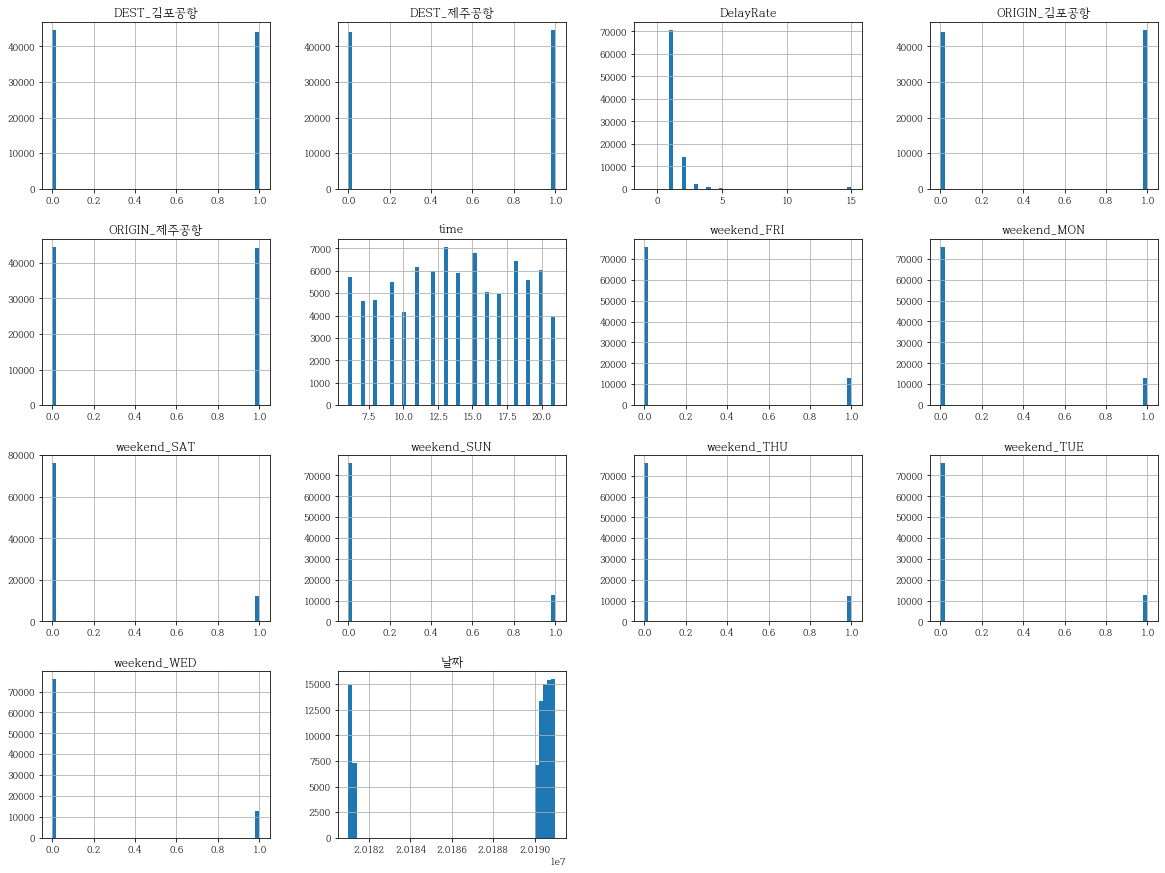

In [8]:
#모든 숫자형 특성에 대한 히스토그램
%matplotlib inline
import matplotlib.pyplot as plt
fl.depart_flight.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
#테스트 세트 생성
def split_flight_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    flight_indices = shuffled_indices[test_set_size:]
    return data.iloc[flight_indices], data.iloc[test_indices]

In [10]:
# 무작위로 샘플 선택하여 데이터셋의 20% 분리
# 훈련데이터셋 : 70905개, test데이터셋 : 17726개
flight_set, test_set = split_flight_test(fl.depart_flight, 0.2)
print(len(flight_set), "flight +", len(test_set), "test")

70905 flight + 17726 test


In [11]:
from sklearn.model_selection import train_test_split
flight_set, test_set = train_test_split(fl.depart_flight, test_size=0.2, random_state=42)

In [12]:
#계층별로 데이터셋에 충분한 샘플 수가 있어야함 -> 중요도 편향 방지
#DelayRate를 1.5로 나누고 6보다 큰 카테고리는 6로 합친다.
fl.depart_flight["delay"] = np.ceil(fl.depart_flight["DelayRate"] / 1.5)
fl.depart_flight["delay"].where(fl.depart_flight["DelayRate"] < 6, 6.0, inplace=True)

In [13]:
#계층별 샘플링
from sklearn.model_selection import StratifiedShuffleSplit
 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for flight_index, test_index in split.split(fl.depart_flight, fl.depart_flight["delay"]):
    strat_flight_set = fl.depart_flight.loc[flight_index]
    strat_test_set = fl.depart_flight.loc[test_index]

In [14]:
#전체 데이터셋에서 delay카테고리의 비율측정
fl.depart_flight["delay"].value_counts() / len(fl.depart_flight)

1.0    0.794699
2.0    0.185026
6.0    0.008789
3.0    0.007300
4.0    0.002866
0.0    0.001320
Name: delay, dtype: float64

In [15]:
#delay특성 삭제 데이터 원래 상태로 복구
for set_ in (strat_flight_set, strat_test_set):
    set_.drop("delay", axis=1, inplace=True)

In [16]:
#훈련데이터셋 손상 방지 복사본 만들어 사용
fl.depart_flight = strat_flight_set.copy()

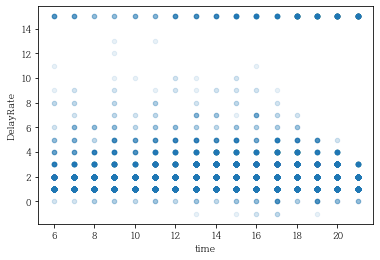

In [17]:
#데이터 시각화
fl.depart_flight.plot(kind="scatter", x='time', y="DelayRate", alpha=0.1)

c:\users\kss09\appdata\local\programs\python\python37\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


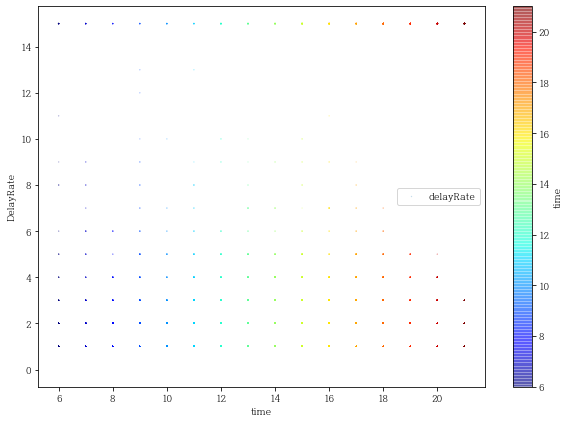

In [18]:
fl.depart_flight.plot(kind="scatter", x="time", y="DelayRate", alpha=0.4,
s=fl.depart_flight["DelayRate"]/100, label="delayRate", figsize=(10,7),
c="time", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [19]:
#표준상관계수사용하여 상관관계 조사
corr_matrix = fl.depart_flight.corr()

In [20]:
#지연률과 다른 특성 사이의 상관관계 크기가 얼마나 되는지
# 1에 가까울 수록 강한 상관관계
corr_matrix["DelayRate"].sort_values(ascending=False)

DelayRate      1.000000
time           0.108853
weekend_FRI    0.040759
DEST_김포공항      0.034416
ORIGIN_제주공항    0.034416
weekend_SAT    0.014913
weekend_SUN   -0.000783
날짜            -0.005169
weekend_THU   -0.006235
weekend_TUE   -0.008856
weekend_WED   -0.016314
weekend_MON   -0.023317
DEST_제주공항     -0.034416
ORIGIN_김포공항   -0.034416
Name: DelayRate, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A372EC608>,
      dtype=object)

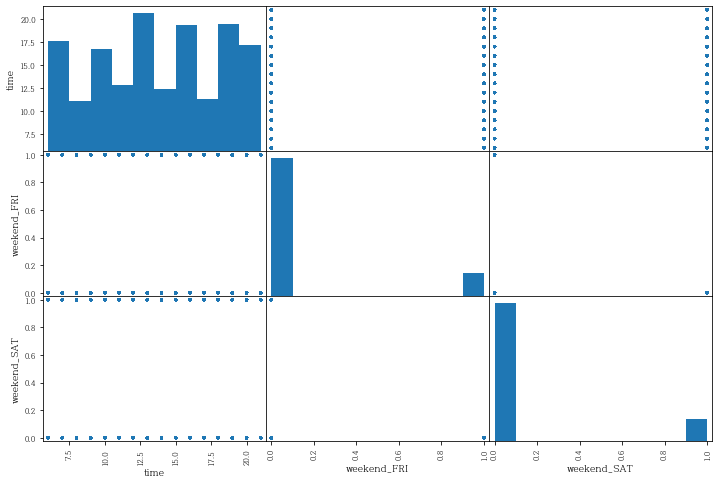

In [21]:
#숫자형 특성 사이에 산점도
from pandas.plotting import scatter_matrix
 
attributes = ["time", "weekend_FRI", "weekend_SAT"]
scatter_matrix(fl.depart_flight[attributes], figsize=(12, 8))

In [22]:
depart_flight = strat_flight_set.drop("DelayRate", axis=1)
depart_flight_labels = strat_flight_set["DelayRate"].copy()

In [23]:
#선형 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
 
lin_reg = LinearRegression()
lin_reg.fit(depart_flight,depart_flight_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#몇개의 샘플 적용
some_data = depart_flight.iloc[:5]
some_labels = depart_flight_labels.iloc[:5]

In [25]:
some_data

,날짜,time,ORIGIN_김포공항,ORIGIN_제주공항,DEST_김포공항,DEST_제주공항,weekend_FRI,weekend_MON,weekend_SAT,weekend_SUN,weekend_THU,weekend_TUE,weekend_WED
60089,20190211,11,1,0,0,1,0,1,0,0,0,0,0
32268,20190628,20,0,1,1,0,1,0,0,0,0,0,0
66191,20190406,9,1,0,0,1,0,0,1,0,0,0,0
63444,20190313,6,1,0,0,1,0,0,0,0,0,0,1
68307,20190423,15,1,0,0,1,0,0,0,0,0,1,0


In [26]:
#실제 DelayRate
some_labels

60089    1
32268    1
66191    1
63444    1
68307    1
Name: DelayRate, dtype: int8

In [27]:
#예측 DelayRate
#각각 약 0.3,0.2,0.6,0.1,0.2 오차률을 보임
lin_reg.predict(some_data)

array([1.17380119, 1.69170604, 1.23404215, 1.0457645 , 1.3403484 ])

In [28]:
list(some_labels)

[1, 1, 1, 1, 1]

In [29]:
#회귀 모델의 RMSE
#예측 오차 1.3
from sklearn.metrics import mean_squared_error
flight_delay_predictions = lin_reg.predict(depart_flight)
lin_mse = mean_squared_error(depart_flight_labels, flight_delay_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2791958372721743

In [30]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(depart_flight, depart_flight_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [31]:
#예측 오차 : 0.8
depart_flight_predictions = tree_reg.predict(depart_flight)
tree_mse = mean_squared_error(depart_flight_labels, depart_flight_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.815349756727975

In [32]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, depart_flight, depart_flight_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [33]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [34]:
#결정트리 점수 : 평균 0.98 +- 0.05 사이
display_scores(tree_rmse_scores)

Scores: [0.93018564 0.96069514 0.99919267 1.04375364 0.95616705 1.00337828
 0.90973822 0.95018623 1.05784266 1.06121668]
Mean: 0.9872356209974107
Standard deviation: 0.051341261542758816


In [35]:
#선형 회귀 모델 점수 : 평균  1.28 +-0.08 사이
lin_scores = cross_val_score(lin_reg, depart_flight, depart_flight_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.28100158 1.27596138 1.2856383  1.28848626 1.24349684 1.24641849
 1.09139699 1.24981887 1.37657179 1.427603  ]
Mean: 1.2766393486094594
Standard deviation: 0.08370372225200695


In [36]:
#랜덤 포레스트
#훈련 세트에 대한 점수 : 0.8
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(depart_flight, depart_flight_labels)
forest_mse = mean_squared_error(depart_flight_labels, depart_flight_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

c:\users\kss09\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.815349756727975

In [37]:
#랜덤포레스트 모델 점수 : 평균 1.2 +- 0.08 사이
forest_scores = cross_val_score(forest_reg, depart_flight, depart_flight_labels, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-lin_scores)
display_scores(forest_rmse_scores)

Scores: [1.28100158 1.27596138 1.2856383  1.28848626 1.24349684 1.24641849
 1.09139699 1.24981887 1.37657179 1.427603  ]
Mean: 1.2766393486094594
Standard deviation: 0.08370372225200695
